In [2]:
import random
import numpy as np
import networkx as nx
import collections
from matplotlib import pyplot as plt
import math

def gen_ER(n,m) :
    G  = nx.Graph()
    G.add_nodes_from(range(n))
    nodes=list(G.nodes())
    edge_count=0
    while edge_count < m:
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u==v or G.has_edge(u,v):
            continue
        else:
            G.add_edge(u,v)
            edge_count=edge_count+1  
    #nx.draw_networkx(G)         
    return G
#M=gen_ER(5,7) 

In [3]:
def gen_WS(n,k,r):
    G=nx.Graph()
    nodes = list(range(n))
    for j in range(1, k+1):
        targets = nodes[j:] + nodes[0:j]
        G.add_edges_from(zip(nodes,targets))
         
    
    for j in range(1, k):
        targets = nodes[j:] + nodes[0:j] 
        for u,v in zip(nodes,targets):
            if random.random() < r:
                w = random.choice(nodes)
                while w == u or G.has_edge(u,w):
                    w = random.choice(nodes)
                    if G.degree(u) >= n-1:
                        break
                else:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
    #nx.draw_networkx(G)                
    return G
#F=gen_WS(8,2,0)

In [4]:
def gen_BA(n0,q,t):
    G=nx.Graph()
    
    nodes = list(range(n0))
    targets = nodes[1:] + nodes[0:1]
    G.add_edges_from(zip(nodes,targets))
    
    for i in range(n0,t+n0):
        for j in range(q):
            degree_dict =dict(G.degree())
            prob=dict()
            for key in degree_dict :
                prob[key] = degree_dict[key]/sum(degree_dict.values())

            cumprob=list()
            prev=0
            for t,u in prob.items():
                temp=[t,prev+u]
                cumprob.append(temp)
                prev=prev+u
    
    
            prev_cum=0
            s=random.random()
            k=0
            while (not (s>prev_cum and s<=cumprob[k][1])):
                prev_cum=cumprob[k][1]
                k+=1
     
            G.add_edge(i,cumprob[k][0])
    #nx.draw_networkx(G)
    return G   
#C=gen_BA(3,2,12)

In [5]:
def get_sw(G):
    avg=0.0
    for node in G:
        path_length=nx.single_source_shortest_path_length(G, node)
        avg += sum(path_length.values())
    
    n=len(G)
    return avg/(n*(n-1))
    
def get_sw2(G):
  G1= nx.erdos_renyi_graph(50,0.5)
  L=nx.average_shortest_path_length(G1)
  C=nx.average_clustering(G1) 
  Lr=nx.average_shortest_path_length(G)
  Cr=nx.average_clustering(G)
  x=Lr/L
  y=Cr/C
  z=y/x
  if (y>1):
    print("it is a small word graph")
    #print(y)
  return y
#C=gen_WS(8,2,0)
#get_sw2(C)



In [6]:
def get_ce(G):
    c = nx.clustering(G).values()
    print(c)
    #returns the average clustring coefficient of graph
    return sum(c) / len(c)
#get_ce(M)

In [7]:

def get_sf(g):
    edge_dict = collections.defaultdict(lambda: collections.defaultdict(int))
    degree_dict = collections.defaultdict(int)
    edge_degree = [sorted(dict(g.degree(e)).values()) for e in g.edges()]
    for e in edge_degree:
        edge_dict[e[0]][e[-1]] +=1
    for i in dict(g.degree(e)).values():
        degree_dict[i] +=1
    edge_number = g.number_of_edges()
    node_number = g.number_of_nodes()
    ebks, ks = [], []
    for k1 in edge_dict:
        p1, p2 = 0, 0
        nk2k = np.sum(edge_dict[k1].values())
        pk1 = float(degree_dict[k1])/node_number
        k1pk1 = k1*pk1
      
        for k2 in edge_dict[k1]:
            if k2 >= 3*k1:
                pk2k = float(edge_dict[k1][k2])/edge_number
                pk2 = float(degree_dict[k2])/node_number
                p1 += pk2k/(k2*k2**(-2.8))
        for k in degree_dict:
            if k>=3*k1:
                pk = float(degree_dict[k])/node_number
                p2 += pk
        if p2 > 0 and p1 > 0:
            ebks.append(p1/p2)
            ks.append(k1)
  
    A = np.empty((len(ks), 2))
    A[:,0] = np.log(ks)
    A[:,1] = 1
    res = np.linalg.lstsq(A, np.log(ebks))
    return res[0][0]
#print(get_sf(C))

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

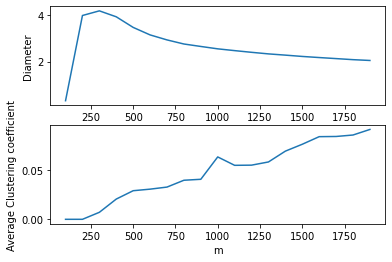

In [8]:

sw_ER = list()
ce_ER = list()

n=200
a_list = np.arange(start=100, stop=2000, step=100)
for i in a_list:
    G = gen_ER(n,i)
    sw_ER.append(get_sw(G))
    ce_ER.append(get_ce(G))

plt.figure()
plt.subplot(211)
plt.xlabel('m')
plt.ylabel('Diameter')
plt.plot(a_list, sw_ER)
plt.subplot(212)
plt.xlabel('m')
plt.ylabel('Average Clustering coefficient')
plt.plot(a_list, ce_ER)

plt.show()

dict_values([0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.66666

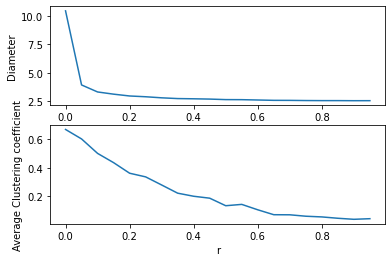

In [9]:
sw_WS = list()
ce_WS = list()
n=200
a_list = np.arange(start=0, stop=1, step=0.05)
for i in a_list:
    G = gen_WS(n,5,i)
    sw_WS.append(get_sw(G))
    ce_WS.append(get_ce(G))
 
plt.figure()
plt.subplot(211)
plt.xlabel('r')
plt.ylabel('Diameter')
plt.plot(a_list, sw_WS)
plt.subplot(212)
plt.xlabel('r')
plt.ylabel('Average Clustering coefficient')
plt.plot(a_list, ce_WS)
plt.show()

dict_values([0, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.3333333333333333, 0, 1.0, 1.0, 1.0])
dict_values([0.047619047619047616, 0, 0.16666666666666666, 0.06666666666666667, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0])
dict_values([0.13333333333333333, 0.16666666666666666, 0, 0, 0.047619047619047616, 0.3333333333333333, 0.2, 0.6666666666666666, 0, 0.6666666666666666, 0, 0, 0, 0.3333333333333333, 0, 0, 0, 0, 1.0, 0])
dict_values([0.1, 0, 0.10714285714285714, 0.06666666666666667, 0.3333333333333333, 0.047619047619047616, 0, 0.2, 0.06666666666666667, 0, 0, 1.0, 0.3333333333333333, 0, 0.3333333333333333, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0])
dict_values([0, 0, 0.10714285714285714, 0.2, 0.09523809523809523, 0.044444444444444446, 0.07272727272727272, 0, 0.2, 0, 0, 0.16666666666666666, 0, 0, 1.0, 0.3, 0, 0, 0, 1.0, 0.3333333333333333, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 0])
dict_values([0, 0, 0.16666666666666666, 0.07272727272727272, 0.05714285714285

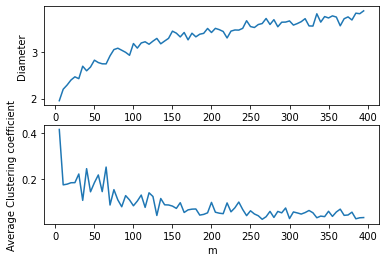

In [10]:
sw_BA = list()
ce_BA = list()
sf_BA = list()
n=200
a_list = np.arange(start=5, stop=400, step=5)
for i in a_list:
    G = gen_BA(5,2,i)
    sw_BA.append(get_sw(G))
    ce_BA.append(get_ce(G))

plt.figure()
plt.subplot(211)
plt.xlabel('m')
plt.ylabel('Diameter')
plt.plot(a_list, sw_BA)
plt.subplot(212)
plt.xlabel('m')
plt.ylabel('Average Clustering coefficient')
plt.plot(a_list, ce_BA)



plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


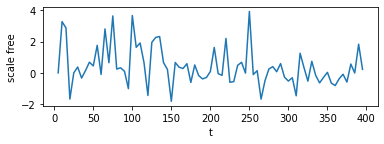

In [13]:
sf_BA = list()
n=200
a_list = np.arange(start=5, stop=400, step=5)
for i in a_list:
  G = gen_BA(5,2,i)
  sf_BA.append(get_sf(G))


plt.figure()
plt.subplot(211)
plt.xlabel('t')
plt.ylabel('scale free')
plt.plot(a_list, sf_BA)
plt.show()